<a href="https://colab.research.google.com/github/akshayugalmogale/Sports-Data-Analysis-Winning-Team-Prediction-Using-Machine-Learning/blob/main/Runs_Wickets_Interactive_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

## Objective:

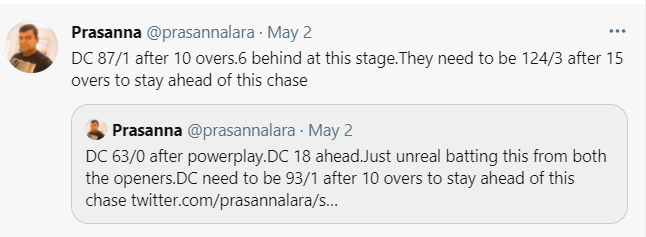

## Fetch probability values:

In [ ]:
# PBKS = [0.35559, 0.39784, 0.04911, 0.0,     0.09332, 0.05599, 0.04813]
# DC =   [0.30889, 0.41801, 0.06351, 0.00250, 0.11990, 0.03984, 0.04734]

In [ ]:
def get_pbvalues(teamName):
  
    if teamName == 'DC':
        p_0 = 0.30889
        p_1 = 0.30889 + 0.41801
        p_2 = 0.30889 + 0.41801 + 0.06351
        p_3 = 0.30889 + 0.41801 + 0.06351 + 0.00250
        p_4 = 0.30889 + 0.41801 + 0.06351 + 0.00250 + 0.11990
        p_6 = 0.30889 + 0.41801 + 0.06351 + 0.00250 + 0.11990 + 0.03984
        p_w = 1
    
    elif teamName == 'PBKS':
        p_0 = 0.35559
        p_1 = 0.35559 + 0.39784
        p_2 = 0.35559 + 0.39784 + 0.04911
        p_3 = 0.35559 + 0.39784 + 0.04911 + 0.0
        p_4 = 0.35559 + 0.39784 + 0.04911 + 0.0 + 0.09332
        p_6 = 0.35559 + 0.39784 + 0.04911 + 0.0 + 0.09332 + 0.05599
        p_w = 1

    return p_0, p_1, p_2, p_3, p_4, p_6, p_w


## Runs prediction Model:

In [ ]:
def predict_runs(target, current_score, current_wickets, current_overs):
  
    # pb values of both teams
    i1p_0, i1p_1, i1p_2, i1p_3, i1p_4, i1p_6, i1p_w = get_pbvalues('PBKS')
    i2p_0, i2p_1, i2p_2, i2p_3, i2p_4, i2p_6, i2p_w = get_pbvalues('DC')

    pred_runs = current_score
    pred_wks = current_wickets
    leftover_balls = 120 - current_overs*6

    for i in range(leftover_balls):
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break
        if pred_runs > target:
            break
        # print('pred_runs: ', pred_runs)
        # print('pred_wks: ', pred_wks)
    
    return pred_runs

In [ ]:
# predict_runs(target, current_score, current_wickets, current_overs)
predict_runs(167, 0, 0, 0)

170

## Winner function:

In [ ]:
def get_win(pred_runs, target):
    if pred_runs > target:
        return 'win'
    elif pred_runs == target:
        return 'tie'
    else:
        return 'lose'

In [ ]:
# runs, wickets, overs, 
# win - 1st ing score

# PBKS - 166/6

target = 167

current_score = 87
current_wickets = 1
current_overs = 10

iter_count = 100

runs_ls = []
results_ls = []

win_count = 0
tie_count = 0
lose_count = 0

for i in range(iter_count):
    pred_runs = predict_runs(target, current_score, current_wickets, current_overs)
    runs_ls.append(pred_runs)
    result_pred = get_win(pred_runs, target)
    results_ls.append(result_pred)

    if result_pred == 'win':
        win_count += 1
    elif result_pred == 'tie':
        tie_count += 1
    else:
        lose_count +=1

In [ ]:
win_count, tie_count, lose_count

(37, 2, 61)

## Find out Runs at a required stage:

In [ ]:
# find out runs:
def find_runs(current_score, target, current_wickets, at_overs):
    runs_ls = []
    results_ls = []

    req_runs = []
    win_ls = []

    for i in range(current_score, target + 1):
        win_count = 0
        tie_count = 0
        lose_count = 0

        for j in range(100):
            pred_runs = predict_runs(target, i, current_wickets, at_overs)
            runs_ls.append(pred_runs)
            result_pred = get_win(pred_runs, target)
            results_ls.append(result_pred)

            if result_pred == 'win':
                win_count += 1
            elif result_pred == 'tie':
                tie_count += 1
            else:
                lose_count +=1

            win_ls.append(win_count)
            req_runs.append(i)
            # print('runs: ', i, ' win%: ', win_count)

    required_runs = current_score
    for i in range(len(req_runs)):
        if win_ls[i] >= 50:
            required_runs = req_runs[i]
            # print('Runs to be: ', req_runs[i])
            break

    return required_runs


In [ ]:
# find_runs(current_score, target, current_wickets, at_overs)
find_runs(87, 167, 1, 11)

100

## Find out Wickets they can afford to lose:

In [ ]:

def find_wickets(current_score, target, current_wickets, at_overs):

#     find_runs(current_score, target, current_wickets, at_overs)
    req_runs = find_runs(current_score, target, current_wickets, at_overs)

    runs_ls = []
    results_ls = []

    req_wks = []
    win_ls = []

    for i in range(current_wickets, 10):
        win_count = 0
        tie_count = 0
        lose_count = 0

        for j in range(100):
#             pred_runs = predict_runs(target, req_runs, i, at_overs)
            pred_runs = predict_runs(target, current_score, i, at_overs)
            runs_ls.append(pred_runs)
            result_pred = get_win(pred_runs, target)
            results_ls.append(result_pred)

            if result_pred == 'win':
                win_count += 1
            elif result_pred == 'tie':
                tie_count += 1
            else:
                lose_count +=1

        win_ls.append(win_count)
        req_wks.append(i)
#         print('wickets: ', i, ' win%: ', win_count)

    req_wicket_value = current_wickets
    
    for i in range(len(req_wks)):
        if (win_ls[i] < 45)  :
            req_wicket_value = req_wks[i]
            break

    return req_wicket_value

In [ ]:
# wickets they can afford to lose:

# find_wickets(current_score, target, current_wickets, at_overs)
find_wickets(129, 167, 1, 11)

9

## Function: Interactive chart

In [ ]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

def find_runs_wickets(current_wks, at_overs, target_score):
    plt.figure(figsize = (16, 6))
    # x = np.linspace(-10, 10, num=1000)
    x = np.array(list(range(21)))
    req_value = find_runs(87, target_score, current_wks, at_overs)
    req_wk_value = find_wickets(87, target_score, current_wks, at_overs)

    if at_overs == 10:
        req_value = 87
        req_wk_value = 1

    
    # print(req_value)
    y = np.array([req_value for i in range(21)])

    # plt.plot(x, current_overs * x + target_score)
    # plt.plot(x, y)
    plt.scatter(at_overs, req_value, s = 1200, color = 'red')
    plt.axhline(target_score, ls = '--', color = 'blue')
    plt.text( 1, target_score + 10, 'Target Score :' + str(target_score) , color = 'darkblue', fontsize = 13)
    plt.text( at_overs, req_value, str(req_value) + '/' + str(req_wk_value), color = 'white', fontsize = 12,  horizontalalignment='center', verticalalignment='center')
    plt.text(at_overs, req_value - 30, 'DC has to be at ' + str(req_value) + '/' +  str(req_wk_value) + ' after ' + str(at_overs) + ' ov', horizontalalignment='center')
    plt.ylim(50, target_score + 50)
    plt.xticks(x)
    plt.title('Where should DC be?', fontsize = 20)
    plt.xlabel('Overs')
    plt.ylabel('Score')
    plt.show()

# x=widgets.IntSlider(min=-10, max=30, step=1, value=10)

# find_wickets(current_score, target, current_wickets, at_overs)
# find_wickets(87, 167, 1, 14)


## Objective:

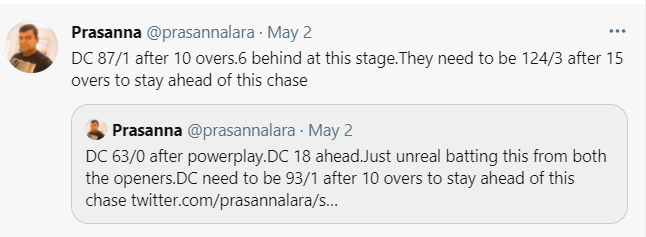

## Interactive Visualization:

In [ ]:
print('current_score = DC: 87/1 (10 overs)')
print('')

interactive_plot = interactive(find_runs_wickets, current_wks = widgets.IntSlider(min=1, max=10, step=1, value=1),  at_overs=widgets.IntSlider(min=10, max=20, step=1, value=10), target_score = widgets.IntSlider(min=0, max=250, step=1, value=167))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

current_score = DC: 87/1 (10 overs)



interactive(children=(IntSlider(value=1, description='current_wks', max=10, min=1), IntSlider(value=10, descri…